In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Bharti
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Bharti
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from string import digits

In [3]:
dataset=pd.read_csv('Data.csv', encoding = "ISO-8859-1")

In [4]:
dataset.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


In [5]:
train = dataset[dataset['Date'] < '20150101']
test = dataset[dataset['Date'] > '20141231']

In [6]:
data=train.iloc[:,2:27]
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title


In [7]:
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [8]:
#data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
data.replace('[^\w\s]','')

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft
5,Fifth round draw,BBC unveils secret weapon in ratings war Sout...,Second Division round up,European round up,Third Division round up,Welfare could claim Killie tie as Caley Thistl...,Ferguson puts brave face on Rio meltdown,Southgate in striking form to pre empt penalties,Second bite for Wolves,Scallywags have Chelsea looking to the bench,...,Time Warner and AOL to merge,Keep up,Waging global war,Desktop icons No The Qwerty keyboard,The sec s files,The low down Workplace bullying,Met not equipped to solve murders,Tranmere tie will not be replayed,Rebel attacks take toll on Russia,Met lent stopped car to Lawrence
6,Man Utd South Melbourne,How North Atlantic drift could carry away Old ...,Buoyant BBC to show Brazi

In [9]:
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title


In [10]:
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [11]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [12]:
newdata = pd.DataFrame(headlines,columns={'headlines'}) 

In [13]:
newdata.head(5)


,headlines
0,a hindrance to operations extracts from the...
1,scorecard the best lake scene leader german s...
2,coventry caught on counter by flo united s riv...
3,pilgrim knows how to progress thatcher facing ...
4,hitches and horlocks beckham off but united su...


In [14]:
newdata.keys()

Index(['headlines'], dtype='object')

In [15]:
NSM = pd.concat([dataset.Label,newdata.headlines], axis=1)

In [16]:
NSM.head()

,Label,headlines
0,0,a hindrance to operations extracts from the...
1,0,scorecard the best lake scene leader german s...
2,0,coventry caught on counter by flo united s riv...
3,1,pilgrim knows how to progress thatcher facing ...
4,1,hitches and horlocks beckham off but united su...


In [17]:
df_new = NSM[NSM['headlines'].notnull()]


In [18]:
df_new['word_count']=df_new['headlines'].apply(lambda x:len(str(x).split(" ")))
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Label,headlines,word_count
0,0,a hindrance to operations extracts from the...,166
1,0,scorecard the best lake scene leader german s...,147
2,0,coventry caught on counter by flo united s riv...,139
3,1,pilgrim knows how to progress thatcher facing ...,172
4,1,hitches and horlocks beckham off but united su...,137


In [19]:
#NSM['R']=NSM['headlines'].apply(lambda x:" ".join(x.lower() for x in x.split()))
#NSM['R'].head()

In [20]:
df_new['char_count']=df_new['headlines'].str.len()
df_new[['headlines','char_count']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,headlines,char_count
0,a hindrance to operations extracts from the...,911
1,scorecard the best lake scene leader german s...,786
2,coventry caught on counter by flo united s riv...,758
3,pilgrim knows how to progress thatcher facing ...,948
4,hitches and horlocks beckham off but united su...,733


In [21]:
#df_new['stopwords']=df_new['headlines'].apply(lambda x: len([x for x in x.split() if x in stopwords.words('english')]))
#df_new[['headlines','stopwords']].head()

In [22]:
df_new['R']=df_new['headlines'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df_new['R'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    a hindrance to operations extracts from the le...
1    scorecard the best lake scene leader german sl...
2    coventry caught on counter by flo united s riv...
3    pilgrim knows how to progress thatcher facing ...
4    hitches and horlocks beckham off but united su...
Name: R, dtype: object

In [23]:
txt=df_new['headlines']


In [24]:
def t(txt):
    string=" "
    for i in txt:
        string+=str(i)
    return string
t(txt[:1])

' a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [25]:
remove_num=str.maketrans('','',digits)
new_txt=t(txt).translate(remove_num)
new_txt[:100]

' a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys b'

In [27]:
tokens=word_tokenize(new_txt)
tokens[:10]

['a',
 'hindrance',
 'to',
 'operations',
 'extracts',
 'from',
 'the',
 'leaked',
 'reports',
 'scorecard']

In [28]:
tokens_n = [word for word in tokens
             if word not in stopwords.words('english')]
tokens_n[:10]

['hindrance',
 'operations',
 'extracts',
 'leaked',
 'reports',
 'scorecard',
 'hughes',
 'instant',
 'hit',
 'buoys']

In [34]:
count_freq = Counter(tokens_n)
count_freq

Counter({'hindrance': 1,
         'operations': 113,
         'extracts': 4,
         'leaked': 165,
         'reports': 316,
         'scorecard': 3,
         'hughes': 55,
         'instant': 16,
         'hit': 552,
         'buoys': 1,
         'blues': 68,
         'jack': 104,
         'gets': 504,
         'skates': 4,
         'ice': 122,
         'cold': 143,
         'alex': 34,
         'chaos': 82,
         'maracana': 1,
         'builds': 36,
         'united': 1086,
         'depleted': 13,
         'leicester': 126,
         'prevail': 4,
         'elliott': 13,
         'spoils': 7,
         'everton': 143,
         'party': 611,
         'hungry': 43,
         'spurs': 99,
         'sense': 82,
         'rich': 206,
         'pickings': 6,
         'gunners': 33,
         'wide': 70,
         'easy': 64,
         'target': 179,
         'derby': 127,
         'raise': 137,
         'glass': 36,
         'strupar': 1,
         'debut': 34,
         'double': 178,
     

In [36]:
most_freq = count_freq.most_common(20)
most_freq

[('b', 12083),
 ('us', 3563),
 ('new', 3514),
 ('says', 2919),
 ('world', 2781),
 ('israel', 2176),
 ('government', 2174),
 ('police', 2120),
 ('china', 2108),
 ('people', 1953),
 ('war', 1849),
 ('year', 1789),
 ('u', 1787),
 ('one', 1760),
 ('russia', 1670),
 ('uk', 1643),
 ('years', 1618),
 ('first', 1609),
 ('review', 1397),
 ('president', 1392)]

In [37]:
string = ""
for word, freq in most_freq:
    string = string + " " + word

In [38]:
wordcloud_est = WordCloud(width=1200, height=800,
                     background_color='black',
                     min_font_size=8)
wordcloud = wordcloud_est.generate(string)

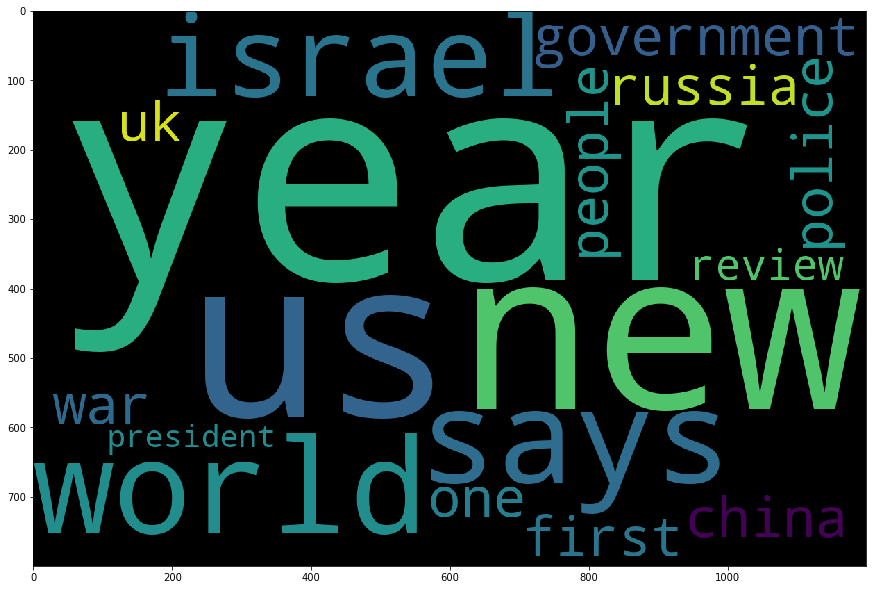

In [39]:
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis=('off')
plt.tight_layout(pad = 0)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:

vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(df_new.headlines)
X = vect.transform(df_new.headlines)

In [43]:
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [48]:
X_df.head(2)

,able to,about the,about to,access to,according to,accused of,across the,after being,after he,after the,...,year in,years after,years ago,years for,years in,years of,you are,you can,you re,yr old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y=df_new.Label
y.head(2)

0    0
1    0
Name: Label, dtype: int64

In [50]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y)

In [52]:
logreg = LogisticRegression()

In [53]:
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
predictions = logreg.predict(x_test)

In [64]:
predictions

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [56]:
confusion_matrix(y_test, predictions)

array([[220, 258],
       [229, 287]], dtype=int64)

In [57]:
precision_score(y_test, predictions)

0.5266055045871559

In [58]:
recall_score(y_test, predictions)

0.5562015503875969

In [59]:
f1_score(y_test, predictions)

0.5409990574929312

In [60]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

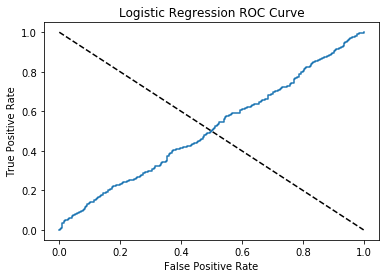

In [61]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logitic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()